# Linear Regression

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import random
from random import gauss

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constants and Functions
Migrate these to a separate package when done so they can be used with scripts

In [ ]:
# !pip install names

In [30]:
import utils as ut

## Generate data

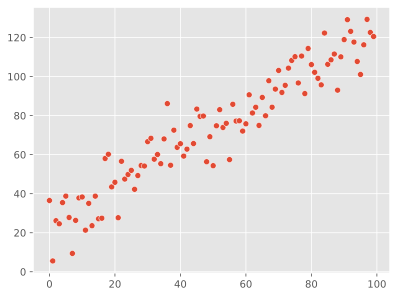

In [32]:
x,y = ut.gendata(ut.NUMB_SAMPLES)
ax = sns.scatterplot(x=x, y=y);

In [34]:
#split into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### Scale Data (is this necessary when there is just 1 independant variable?)

<mark>Anyway here is a list of tandard Scaler methods, pay attention to fit and transform<br></mark>
![title](./standardscaler_methods.png)<br>



In [37]:
X_train

array([55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28, 93,  5, 66,
       65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,  3, 17, 38,
        8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79,
       41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1, 52, 21,  2,
       23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51])

In [40]:
X_train.shape

(80, 1)

In [38]:
#add an additional dimension so these work with standard scaler,
#Xtrain goes from (80,) to (80,1)
#(-1,1) means numpy should determine the rows needed (80), and have 1 column
#skip this step and standard scaler below will tell you to do it
X_train=X_train.reshape(-1,1)  #add a dimension
y_train=y_train.reshape(-1,1)

X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

#BTW if you mix up the (-1,1) above, ie (1,-1) you get 1 row and 80 columns
#which will give you 80 seperate means (1 for each column of 1)
#as opposed to (-1,1) which gives you 1 mean (1 for each column of 80)

### <mark>calculate mean and standard deviation on train set only!

then use standard scaler to scale both train and test sets with this mean and standard deviation  
    
  x=(x-mean)/std

In [42]:
import math
from sklearn import preprocessing

#calculate mean and std on train set
scaler_Xtrain = preprocessing.StandardScaler().fit(X_train)
scaler_ytrain = preprocessing.StandardScaler().fit(y_train)

#shows the scalers mean and std
scaler_ytrain.mean_,scaler_ytrain.var_
# math.sqrt(scaler_ytrain.var_) #standard deviation
# dir(scaler_ytrain)

(array([73.02546817]), array([965.09946466]))

In [43]:
#then apply scaler params to train and test set (standardize)
X_train=scaler_Xtrain.transform(X_train)
y_train=scaler_ytrain.transform(y_train)
X_test=scaler_Xtrain.transform(X_test)
y_test=scaler_ytrain.transform(y_test)

## Fit Data, the scikitlearn way

Using LinearRegression

In [44]:
from sklearn import linear_model

#create model
reg = linear_model.LinearRegression()

#fit model to data
reg.fit(X=X_train, y=y_train);

In [45]:
#view models linear regression parameters
reg.coef_
reg.intercept_

array([[0.95344988]])

array([2.83623681e-16])

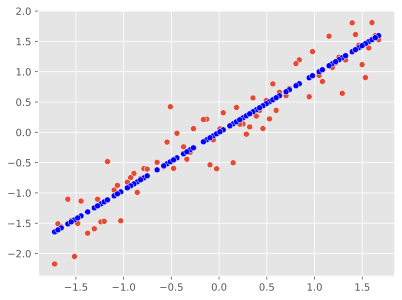

In [48]:
#plot points and linear regression line
#squeeze removes the supurflous dimensions from the arrays that were added above using vals.reshape(-1,1)
ax=sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze());
ax=sns.scatterplot(x=X_train.squeeze(), y=reg.predict(X_train).squeeze(),color='blue' );

### Predict on new data

In [49]:
#have the trained model predict on new data(make sure your data is scaled first)
y_pred = reg.predict(X_test)
y_pred[:5]

array([[ 1.06511765],
       [ 0.07431053],
       [ 0.6357679 ],
       [-0.1899047 ],
       [-0.2229316 ]])

In [50]:
#if you dont scale the data you are predicting on first you will get results
#that are incorrect
wrong_pred= reg.predict(scaler_Xtrain.inverse_transform(X_test))
wrong_pred[:5]

array([[79.1363402 ],
       [50.53284374],
       [66.74149173],
       [42.90524468],
       [41.9517948 ]])

### Calculate metrics

In [51]:
from sklearn.metrics import mean_squared_error

#mean squared error?
print("Mean squared error for test: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean squared error for train: %.2f" % mean_squared_error(y_train, reg.predict(X_train)))

Mean squared error for test: 0.11
Mean squared error for train: 0.09


### Plot it all

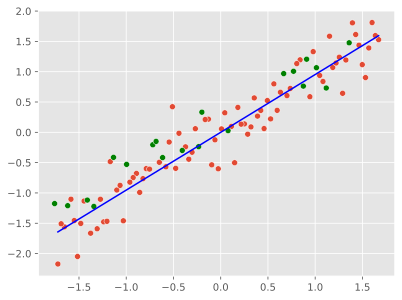

In [52]:
#plot points and linear regression line
ax=sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze())
ax=sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(), color='green')
ax=sns.lineplot(x=X_train.squeeze(), y=reg.predict(X_train).squeeze(),color='blue' )

## Inverse transform, undo the standard scaler

In [53]:
scaler_ytrain.inverse_transform(y_test)[:5]

array([[ 95.72824932],
       [ 73.9022245 ],
       [103.11308932],
       [ 83.34627663],
       [ 65.66280213]])